## Assignment 5




In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df=pd.read_csv('emails.csv')

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [5]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [6]:
df.dropna(inplace = True)

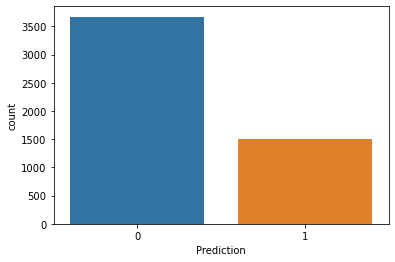

In [18]:
sns.countplot(data = df, x = "Prediction")
plt.show()

In [7]:
df.drop(['Email No.'],axis=1,inplace=True)
X = df.drop(['Prediction'],axis = 1)
y = df['Prediction']

In [8]:
from sklearn.preprocessing import scale
X = scale(X)
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##KNN classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [10]:
print("Prediction",y_pred)

Prediction [0 0 1 ... 1 1 1]


In [11]:
print("KNN accuracy = ",metrics.accuracy_score(y_test,y_pred))

KNN accuracy =  0.8009020618556701


In [12]:
print("Confusion matrix",metrics.confusion_matrix(y_test,y_pred))

Confusion matrix [[804 293]
 [ 16 439]]


## SVM classifier

In [13]:
# cost C = 1
model = SVC(C = 1)

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

In [14]:
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[1091,    6],
       [  90,  365]])

In [15]:
print("SVM accuracy = ",metrics.accuracy_score(y_test,y_pred))

SVM accuracy =  0.9381443298969072
